# STORE CUSTOMER CRM ANALYSIS

## What will you learn from this project?
* Data Preparation
* Data Cleaning
* RFM Analysis
    * Calculate RFM Metrics
    * Calculate RFM Scores
    * Creating & Analysing RFM Segments
* CLTV Analysis
    * Average Order Value
    * Purchase Frequency
    * Repeat Rate & Churn Rate
    * Profit Margin
    * Customer Value
    * Customer Lifetime Value
    * Segmentation

## Introduction
* ***RFM Analysis:*** It is a technique used to segment customer behaviour. It helps to determine marketing and sales strategies by segmenting customers based on their buying habits.
    * Recency (Yenilik): It is the period from the customer's last contact with the company, that is, from the customer's last purchase to today.(Recency = Today's date - Last purchase date)
    * Frequency (Sıklık): Shows how often the customer shops.
    * Monetary (Parasal Değer): It is the total expenditure made by the customer in their shopping.

* ***Customer Lifetime Value (CLTV):*** is considered to be the monetary value that a customer will bring to a company during its relationship and communication with that company.

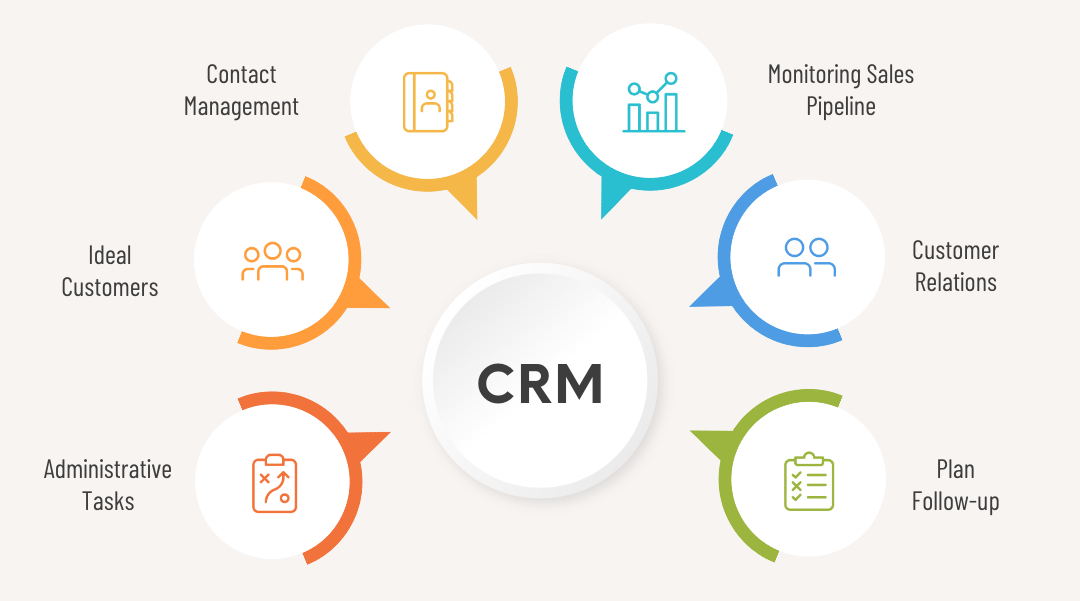

<a id="content"></a>
## Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read & Analyse Data](#3)
4. [Data Distributions](#4)
5. [Data Preparation (Box Plot Analysis)](#5)
6. [Data Cleaning & Analysis](#6)
7. [RFM (Recency, Frequency, Monetary)](#7)
8. [RFM Scores](#8)
9. [RFM Segmentation](#9)
10. [RFM Analysis (Heatmap)](#10)
11. [CLTV (Customer Lifetime Value)](#11)
12. [CLTV Scores](#12)
13. [CLTV Segmentation](#13)
14. [CLTV Analysis](#14)
15. [Conclusion](#15)

<a id='1'></a>
## Python Libraries
---
> Back to [Main Content](#content)
<br>
> Next [Content](#2)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import re
import itertools

/kaggle/input/online-retail-ii/online_retail_II.xlsx


<a id='2'></a>
## Data Content
* This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.
    
    * ***InvoiceNo:*** Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
    * ***StockCode:*** Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
    * ***Description:*** Product (item) name. Nominal. 
    * ***Quantity:*** The quantities of each product (item) per transaction. Numeric.	
    * ***InvoiceDate:*** Invice date and time. Numeric. The day and time when a transaction was generated. 
    * ***UnitPrice:*** Unit price. Numeric. Product price per unit in sterling (Â£). 
    * ***CustomerID:*** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
    * ***Country:*** Country name. Nominal. The name of the country where a customer resides.

* Online Retail II Official Website: https://archive.ics.uci.edu/dataset/502/online+retail+ii
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#1)
<br>
> Next [Content](#3)

<a id='3'></a>
## Read & Analyse Data
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#2)
<br>
> Next [Content](#4)

In [2]:
# Read Data
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.read_excel("/kaggle/input/online-retail-ii/online_retail_II.xlsx", sheet_name="Year 2010-2011")

In [3]:
df_retail = df.copy()
# Show five row of data
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom


In [4]:
# Describe basic statistics of data
df_retail.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541910.000,9.552,-80995.000,1.000,3.000,10.000,80995.000,218.081
InvoiceDate,541910,2011-07-04 13:35:22.342307584,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
Price,541910.000,4.611,-11062.060,1.250,2.080,4.130,38970.000,96.760
Customer ID,406830.000,15287.684,12346.000,13953.000,15152.000,16791.000,18287.000,1713.603


In [5]:
# Information about data
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<a id='4'></a>
## Data Distributions
* Unique Values
* Distribution of Remaining Features
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#3)
<br>
> Next [Content](#5)

In [6]:
# Null Values
df_retail.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [7]:
# Description: Product (item) name. Nominal
# Nunique Value for Description
df_retail["Description"].nunique()

4223

In [8]:
# Description: Product (item) name. Nominal
# Item Count
df_retail.groupby("Description").agg({"Quantity":"sum"}).head()

,Quantity
Description,
20713,-400
4 PURPLE FLOCK DINNER CANDLES,144
50'S CHRISTMAS GIFT BAG LARGE,1913
DOLLY GIRL BEAKER,2448
I LOVE LONDON MINI BACKPACK,389


<a id='5'></a>
## Data Preparation (Box Plot Analysis)
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#4)
<br>
> Next [Content](#6)

In [9]:
# Create Total Price for Customer Prices
df_retail["TotalPrice"] = df_retail["Quantity"] * df_retail["Price"]

In [10]:
# Invoice First 5 Row Review
df_retail.groupby("Invoice").agg({"TotalPrice":"sum"}).head()

,TotalPrice
Invoice,
536365,139.120
536366,22.200
536367,278.730
536368,70.050
536369,17.850


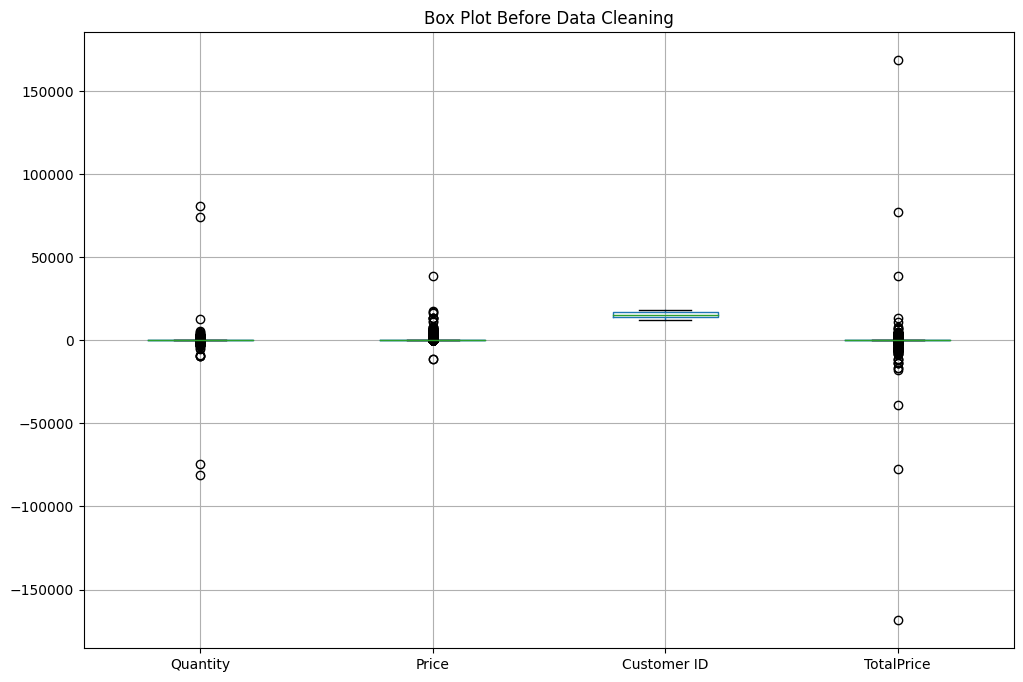

In [11]:
# Before Data Cleaning
plt.figure(figsize=(12,8))
df_retail.boxplot()
plt.title("Box Plot Before Data Cleaning")
plt.show()

In [12]:
# Data Cleaning: Removing invoices for returned goods
df_retail = df_retail[~df_retail["Invoice"].str.contains("C", na=False)] 
df_retail = df_retail[df_retail["Price"] > 0]

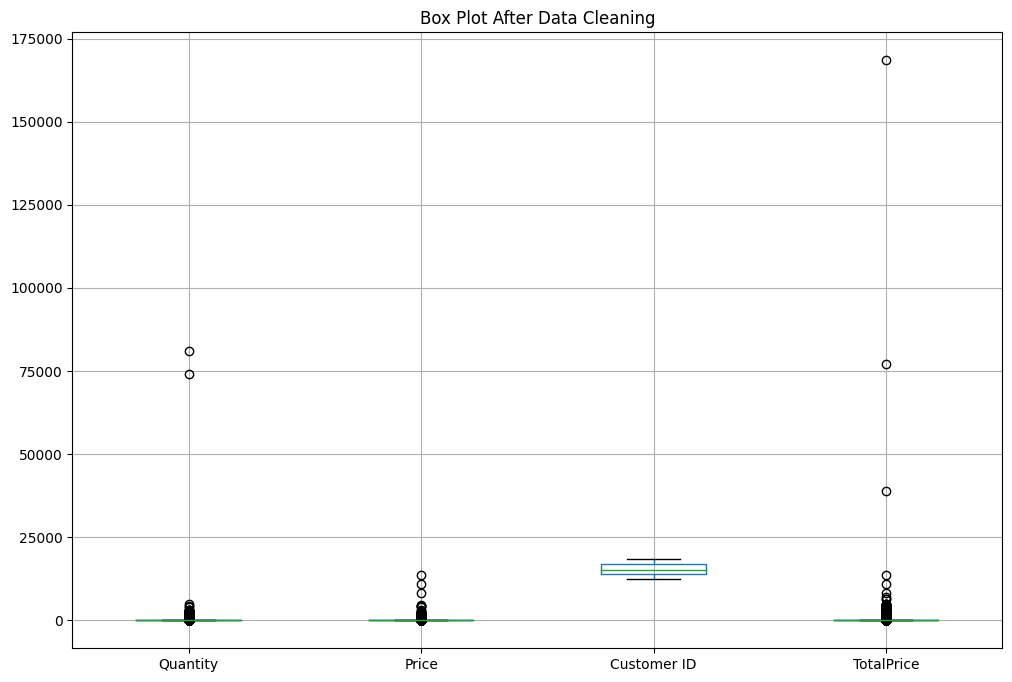

In [13]:
# After Data Cleaning
plt.figure(figsize=(12,8))
df_retail.boxplot()
plt.title("Box Plot After Data Cleaning")
plt.show()

<a id='6'></a>
## Data Cleaning & Analysis
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#5)
<br>
> Next [Content](#7)

In [14]:
# Null Values
df_retail.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    132220
Country             0
TotalPrice          0
dtype: int64

In [15]:
# Drop Null Values
df_retail.dropna(inplace=True)
df_retail.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [16]:
# Invoice Count
df_retail["Invoice"].nunique()

18532

In [17]:
# Max Quantity
df_retail.groupby("Description").agg({"Quantity":"sum"}).sort_values(by="Quantity", ascending=0).head()

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725


In [18]:
# Max Total Price
df_retail.groupby("Description").agg({"TotalPrice":"sum"}).sort_values(by="TotalPrice", ascending=0).head()

,TotalPrice
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.600
REGENCY CAKESTAND 3 TIER,142592.950
WHITE HANGING HEART T-LIGHT HOLDER,100448.150
JUMBO BAG RED RETROSPOT,85220.780
MEDIUM CERAMIC TOP STORAGE JAR,81416.730


<a id='7'></a>
## RFM (Recency, Frequency, Monetary)
* R (Recency) => Time elapsed between today and the last purchase (the larger the score, the smaller the score)
* F (Frequency) => Number of unique invoices (The larger the number, the larger the score)
* M (Monetary) => Total payment on invoice

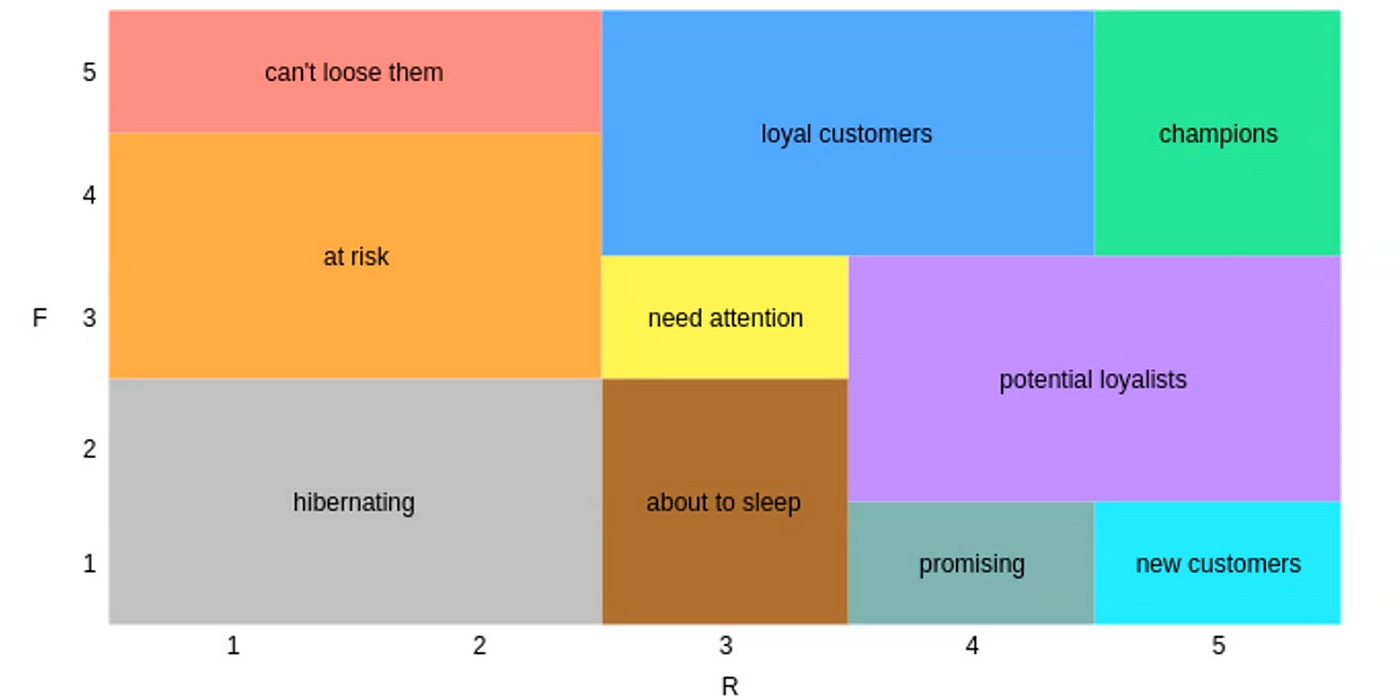

---
> Back to [Main Content](#content)
<br>
> Previous [Content](#6)
<br>
> Next [Content](#8)

In [19]:
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340


In [20]:
# For Recency Because "Time elapsed between today and the last purchase"
# today_date: example datetime
today_date = dt.datetime(2011, 12, 11)

In [21]:
# Last Invoice
df_retail["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [22]:
# RFM DataFrame
rfm = df_retail.groupby("Customer ID").agg({"InvoiceDate": lambda date: (today_date - date.max()).days,
                                            "Invoice": lambda num: num.nunique(),
                                            "TotalPrice": lambda TotalPrice: TotalPrice.sum()})
rfm.columns = ["Recency", "Frequency", "Monetary"]

In [23]:
# RFM Head
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.000,326,1,77183.600
12347.000,3,7,4310.000
12348.000,76,4,1797.240
12349.000,19,1,1757.550
12350.000,311,1,334.400


In [24]:
# RFM Analysis
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4338.000,93.059,100.012,1.000,18.000,51.000,142.750,374.000
Frequency,4338.000,4.272,7.698,1.000,1.000,2.000,5.000,209.000
Monetary,4338.000,2054.271,8989.230,3.750,307.415,674.485,1661.740,280206.020


<a id='8'></a>
## RFM Scores

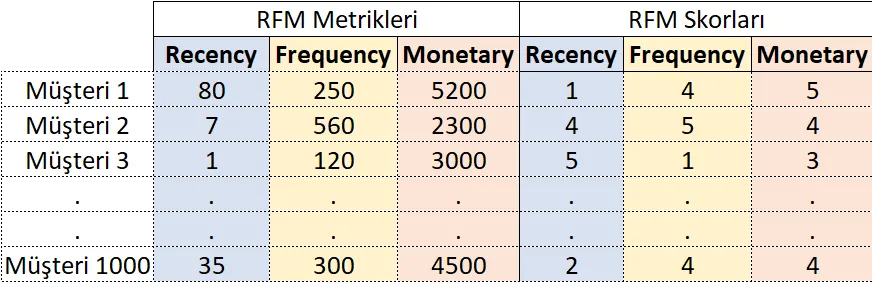

---
> Back to [Main Content](#content)
<br>
> Previous [Content](#7)
<br>
> Next [Content](#9)

In [25]:
# Calculate RFM Score
rfm["Recency_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1])
rfm["Frequency_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["Monetary_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5])

rfm["RFM_Score"] = (rfm["Recency_Score"].astype(str) + rfm["Frequency_Score"].astype(str))

In [26]:
# New RFM Head
rfm.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
Customer ID,,,,,,,
12346.000,326,1,77183.600,1,1,5,11
12347.000,3,7,4310.000,5,5,5,55
12348.000,76,4,1797.240,2,4,4,24
12349.000,19,1,1757.550,4,1,4,41
12350.000,311,1,334.400,1,1,2,11


<a id='9'></a>
## RFM Segmentation
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#8)
<br>
> Next [Content](#10)

In [27]:
# Segmentation
seg_map = {
    r"[1-2][1-2]": "hibernating",
    r"[1-2][3-4]": "at_Risk",
    r"[1-2]5": "cant_loose",
    r"3[1-2]": "about_to_sleep",
    r"33": "need_attention",
    r"[3-4][4-5]": "loyal_customers",
    r"41": "promising",
    r"51": "new_customers",
    r"[4-5][2-3]": "potential_loyalists",
    r"5[4-5]": "champions",
}

In [28]:
rfm["Segment"] = rfm["RFM_Score"].replace(seg_map, regex=True)

In [29]:
rfm.index = rfm.index.astype(int)
rfm.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
Customer ID,,,,,,,,
12346,326,1,77183.600,1,1,5,11,hibernating
12347,3,7,4310.000,5,5,5,55,champions
12348,76,4,1797.240,2,4,4,24,at_Risk
12349,19,1,1757.550,4,1,4,41,promising
12350,311,1,334.400,1,1,2,11,hibernating


In [30]:
# Describe for segments
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").describe()

Recency                                                \
                       count    mean    std    min     25%     50%     75%   
Segment                                                                      
about_to_sleep       352.000  53.312 10.943 34.000  44.000  53.000  64.000   
at_Risk              593.000 153.786 68.619 73.000  96.000 139.000 195.000   
cant_loose            63.000 132.968 65.250 73.000  89.000 108.000 161.000   
champions            633.000   6.362  3.683  1.000   3.000   5.000  10.000   
hibernating         1071.000 217.605 92.014 73.000 135.000 219.000 289.500   
loyal_customers      819.000  33.608 15.577 15.000  20.000  30.000  44.000   
need_attention       187.000  52.428 11.552 34.000  42.000  52.000  61.500   
new_customers         42.000   7.429  3.902  1.000   4.000   8.000  11.000   
potential_loyalists  484.000  17.399  9.339  1.000  10.000  18.000  25.000   
promising             94.000  23.511  5.193 15.000  19.000  23.000  27.000   

                            Frequency                                         \
                        max     count   mean    std   min   25%   50%    75%   
Segment                                                                        
about_to_sleep       72.000   352.000  1.162  0.369 1.000 1.000 1.000  1.000   
at_Risk             374.000   593.000  2.877  0.952 2.000 2.000 3.000  3.000   
cant_loose          373.000    63.000  8.381  4.290 6.000 6.000 7.000  9.000   
champions            13.000   633.000 12.414 16.452 3.000 5.000 8.000 14.000   
hibernating         374.000  1071.000  1.102  0.302 1.000 1.000 1.000  1.000   
loyal_customers      72.000   819.000  6.480  4.546 3.000 4.000 5.000  8.000   
need_attention       72.000   187.000  2.326  0.470 2.000 2.000 2.000  3.000   
new_customers        13.000    42.000  1.000  0.000 1.000 1.000 1.000  1.000   
potential_loyalists  33.000   484.000  2.010  0.651 1.000 2.000 2.000  2.000   
promising            33.000    94.000  1.000  0.000 1.000 1.000 1.000  1.000   

                            Monetary                                      \
                        max    count     mean       std     min      25%   
Segment                                                                    
about_to_sleep        2.000  352.000  471.994   533.591   6.200  194.520   
at_Risk               6.000  593.000 1084.535  2562.073  52.000  412.780   
cant_loose           34.000   63.000 2796.156  2090.490  70.020 1137.505   
champions           209.000  633.000 6857.964 20339.764 201.120 1451.280   
hibernating           2.000 1071.000  488.643  2419.683   3.750  155.110   
loyal_customers      63.000  819.000 2864.248  6007.062  36.560  991.795   
need_attention        3.000  187.000  897.628  1102.503   6.900  385.965   
new_customers         1.000   42.000  388.213   570.776  89.940  195.037   
potential_loyalists   3.000  484.000 1041.222  7656.324  20.800  290.117   
promising             1.000   94.000  294.008   240.407  30.000  141.567   

                                                  
                         50%      75%        max  
Segment                                           
about_to_sleep       330.050  543.750   6207.670  
at_Risk              678.250 1200.620  44534.300  
cant_loose          2225.970 3532.235  10254.180  
champions           2612.960 4954.840 280206.020  
hibernating          296.250  457.930  77183.600  
loyal_customers     1740.480 3052.905 124914.530  
need_attention       638.060 1052.525  12601.830  
new_customers        274.505  358.317   3861.000  
potential_loyalists  521.275  883.730 168472.500  
promising            221.425  361.845   1757.550

<a id='10'></a>
## RFM Analysis (Heatmap)
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#9)
<br>
> Next [Content](#11)

In [31]:
customer_seg = rfm[["Segment", "RFM_Score"]].groupby("Segment").count()
customer_seg.columns = ["Customer Count"]

In [32]:
customer_seg

,Customer Count
Segment,
about_to_sleep,352
at_Risk,593
cant_loose,63
champions,633
hibernating,1071
loyal_customers,819
need_attention,187
new_customers,42
potential_loyalists,484


In [33]:
# RFM Data
recency_values = [1, 2, 3, 4, 5]
frequency_values = [1, 2, 3, 4, 5]

combinations = list(itertools.product(recency_values, frequency_values))

# RFM Matrix
rfm_matrix = pd.DataFrame(combinations, columns=['Recency', 'Frequency'])

def assign_segment(recency, frequency):
    rfm_score = f"{recency}{frequency}"
    for pattern, segment in seg_map.items():
        if re.match(pattern, rfm_score):
            return [segment, recency, frequency]
    return ["undefined", recency, frequency]

# RFM Score
rfm_df = rfm_matrix.apply(lambda row: assign_segment(row['Recency'], row['Frequency']), axis=1)

# RFM Dataframe
rfm_df = pd.DataFrame(list(rfm_df), columns=['Segment', 'Recency', 'Frequency'])

# Segment'e göre müşteri sayısı ekleme
rfm_df = rfm_df.merge(customer_seg, on='Segment', how='left')

rfm_df

,Segment,Recency,Frequency,Customer Count
0,hibernating,1,1,1071
1,hibernating,1,2,1071
2,at_Risk,1,3,593
3,at_Risk,1,4,593
4,cant_loose,1,5,63
5,hibernating,2,1,1071
6,hibernating,2,2,1071
7,at_Risk,2,3,593
8,at_Risk,2,4,593
9,cant_loose,2,5,63


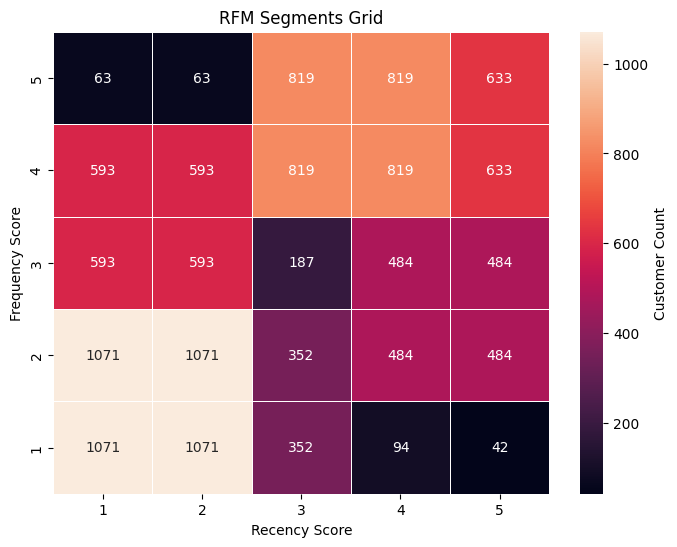

In [34]:
# Create Pivot Table
heatmap_data = rfm_df.pivot(index='Frequency', columns='Recency', values='Customer Count')

# Fill NaN:0
heatmap_data = heatmap_data.fillna(0)

# Frequency ve Recency'ye göre gruplama ve toplama
heatmap_data = heatmap_data.groupby(level=0).sum()
heatmap_data = heatmap_data.sort_index(ascending=False)

# Heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(heatmap_data, annot=True, fmt="n", linewidths=0.5, cbar_kws={'label': 'Customer Count'})

plt.title('RFM Segments Grid')
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.show()

<a id='11'></a>
## CLTV (Customer Lifetime Value)

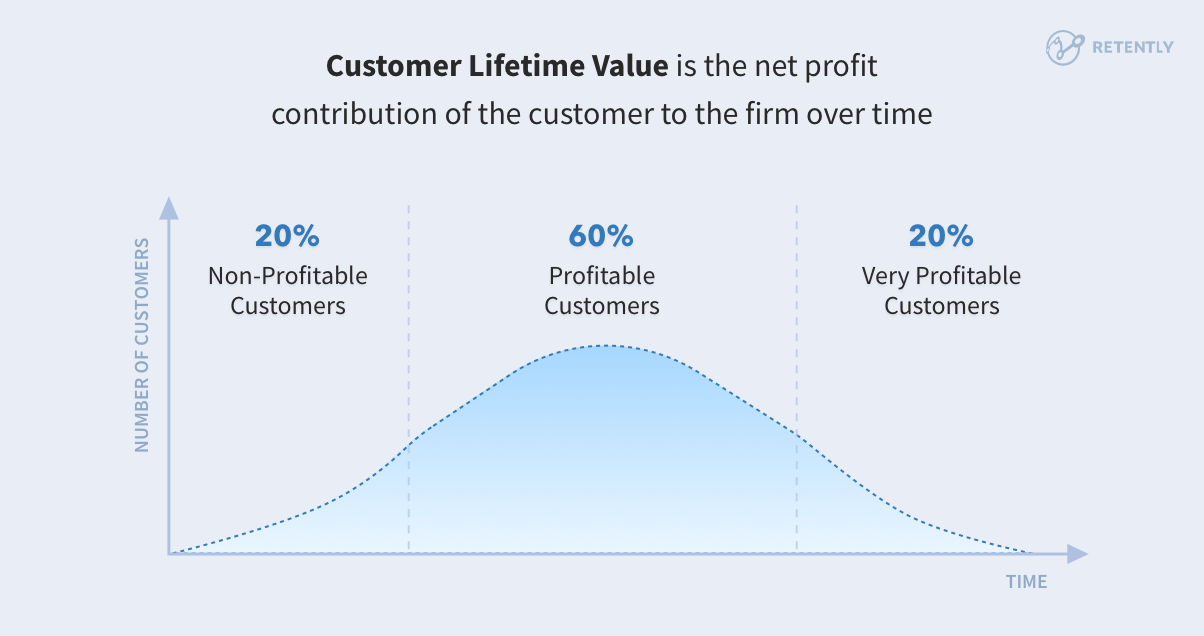

---
> Back to [Main Content](#content)
<br>
> Previous [Content](#10)
<br>
> Next [Content](#12)

In [35]:
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340


In [36]:
cltv = df_retail.groupby("Customer ID").agg({"Invoice": lambda x: x.nunique(),
                                             "Quantity": lambda x: x.sum(),
                                             "TotalPrice": lambda x: x.sum()})
cltv.index = rfm.index.astype(int)
cltv.columns = ["Total_Transaction", "Total_Unit", "Total_Price"]
cltv.head()

,Total_Transaction,Total_Unit,Total_Price
Customer ID,,,
12346,1,74215,77183.600
12347,7,2458,4310.000
12348,4,2341,1797.240
12349,1,631,1757.550
12350,1,197,334.400


<a id='12'></a>
## CLTV Scores
* Average Order Value
* Purchase Frequency
* Repeat Rate & Churn Rate
* Profit Margin
* Customer Value
* Customer Lifetime Value
---
> CLTV = (Customer Value / Churn Rate) * Profit Margin
<br>
> Customer Value = (Avg Order Value * Purchase Frequency)
<br>
> Average Order Value = (Total Price * Total Transaction)
<br>
> Purchase Frequency = (Total Transaction / Total Number of Customers)
<br>
> Churn Rate = (1 - Repeat Rate)
<br>
> Repeat Rate = (Customers of multi Purchases  / Total Number of Customers)
<br>
> Profit Margin = (Total Price * 0.1)

---
> Back to [Main Content](#content)
<br>
> Previous [Content](#11)
<br>
> Next [Content](#13)

In [37]:
# Average Order Value = Total Price * Total Transaction
cltv["Average_Order_Value"] = cltv["Total_Price"] * cltv["Total_Transaction"]

In [38]:
# Total Customer (CLTV DataFrame: Groupby with Customer ID)
Total_Customer = cltv.shape[0]

In [39]:
# Purchase Frequency = Total Transaction / Total Customer
cltv["Purchase_Frequency"] = cltv["Total_Transaction"] / Total_Customer

In [40]:
# Customers of multi Purchases
Multi_Customer = cltv[cltv["Total_Transaction"] > 1].shape[0]

In [41]:
# Repeat Rate = (Customers of multi Purchases / Total Number of Customers)
cltv["Repeat_Rate"] = Multi_Customer / Total_Customer

In [42]:
# Churn Rate = (1 - Repeat Rate)
cltv["Churn_Rate"] = 1 - cltv["Repeat_Rate"]

In [43]:
# Profit Margin = (Total Price * 0.1)
cltv["Profit_Margin"] = cltv["Total_Price"] * 0.1

In [44]:
# Customer Value = (Avg Order Value * Purchase Frequency)
cltv["Customer_Value"] = cltv["Average_Order_Value"] * cltv["Purchase_Frequency"]

In [45]:
# CLTV (Customer Lifetime Value) = (Customer Value / Churn Rate) * Profit Margin
cltv["CLTV"] = (cltv["Customer_Value"] / cltv["Churn_Rate"]) * cltv["Profit_Margin"]

<a id='13'></a>
## CLTV Segmentation
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#12)
<br>
> Next [Content](#14)

In [46]:
cltv["Segment"] = pd.qcut(cltv["CLTV"], 4, labels=["D", "C", "B", "A"])

<a id='14'></a>
## CLTV Analysis
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#13)
<br>
> Next [Content](#15)

In [47]:
cltv.head()

,Total_Transaction,Total_Unit,Total_Price,Average_Order_Value,Purchase_Frequency,Repeat_Rate,Churn_Rate,Profit_Margin,Customer_Value,CLTV,Segment
Customer ID,,,,,,,,,,,
12346,1,74215,77183.600,77183.600,0.000,0.656,0.344,7718.360,17.792,399015.948,A
12347,7,2458,4310.000,30170.000,0.002,0.656,0.344,431.000,48.684,60966.437,A
12348,4,2341,1797.240,7188.960,0.001,0.656,0.344,179.724,6.629,3461.564,B
12349,1,631,1757.550,1757.550,0.000,0.656,0.344,175.755,0.405,206.898,B
12350,1,197,334.400,334.400,0.000,0.656,0.344,33.440,0.077,7.490,D


In [48]:
cltv.sort_values(by="CLTV", ascending=False).head()

,Total_Transaction,Total_Unit,Total_Price,Average_Order_Value,Purchase_Frequency,Repeat_Rate,Churn_Rate,Profit_Margin,Customer_Value,CLTV,Segment
Customer ID,,,,,,,,,,,
14911,201,80265,143825.060,28908837.060,0.046,0.656,0.344,14382.506,1339482.768,55975945087.852,A
14646,73,196915,280206.020,20455039.460,0.017,0.656,0.344,28020.602,344218.045,28024691179.515,A
18102,60,64124,259657.300,15579438.000,0.014,0.656,0.344,25965.730,215483.237,16257125813.519,A
17450,46,69993,194550.790,8949336.340,0.011,0.656,0.344,19455.079,94898.449,5364408635.395,A
12748,209,25747,33719.730,7047423.570,0.048,0.656,0.344,3371.973,339537.005,3326602744.474,A


In [49]:
cltv.sort_values(by="CLTV", ascending=False).describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Transaction,4338.000,4.272,7.698,1.000,1.000,2.000,5.000,209.000
Total_Unit,4338.000,1191.289,5046.082,1.000,160.000,379.000,992.750,196915.000
Total_Price,4338.000,2054.271,8989.230,3.750,307.415,674.485,1661.740,280206.020
Average_Order_Value,4338.000,47079.107,654271.723,3.750,358.715,1491.210,7289.898,28908837.060
Purchase_Frequency,4338.000,0.001,0.002,0.000,0.000,0.000,0.001,0.048
Repeat_Rate,4338.000,0.656,0.000,0.656,0.656,0.656,0.656,0.656
Churn_Rate,4338.000,0.344,0.000,0.344,0.344,0.344,0.344,0.344
Profit_Margin,4338.000,205.427,898.923,0.375,30.742,67.448,166.174,28020.602
Customer_Value,4338.000,796.609,22274.806,0.001,0.088,0.753,7.766,1339482.768
CLTV,4338.000,28813747.506,989207339.382,0.001,8.619,148.942,3559.452,55975945087.852


<a id='15'></a>
## Conclusion
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#14)